<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   temperatureMax               882 non-null    float64       
 1   temperatureMaxTime           882 non-null    object        
 2   windBearing                  882 non-null    int64         
 3   icon                         882 non-null    object        
 4   dewPoint                     882 non-null    float64       
 5   temperatureMinTime           882 non-null    object        
 6   cloudCover                   881 non-null    float64       
 7   windSpeed                    882 non-null    float64       
 8   pressure                     882 non-null    float64       
 9   apparentTemperatureMinTime   882 non-null    object        
 10  apparentTemperatureHigh      882 non-null    float64       
 11  precipType                   882 non-null    

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-1-fe7df1dfe1dd>:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft1['label'] = 1
<ipython-input-1-fe7df1dfe1dd>:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

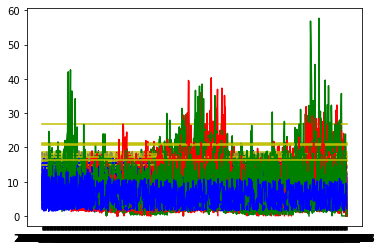

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, MAC002376 to MAC000885
Columns: 830 entries, 2011/11/23 to label
dtypes: float64(829), int64(1)
memory usage: 3.2+ MB


<ipython-input-1-fe7df1dfe1dd>:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']= 0


[[64984 16520]
 [23473 84866]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     81504
           1       0.84      0.78      0.81    108339

    accuracy                           0.79    189843
   macro avg       0.79      0.79      0.79    189843
weighted avg       0.79      0.79      0.79    189843

0.7893364516995622


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimtors } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost Classifier accuracy: 81.90926186375057
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     81504
           1       0.82      0.88      0.85    108339

    accuracy                           0.82    189843
   macro avg       0.82      0.81   

In [1]:
import numpy as np 
import glob as glob
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.cluster import KMeans
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ac

from datetime import datetime, date


weat= pd.read_csv('weather_daily_darksky.csv', parse_dates=["time"])
weat.head()

weat.info()

we = pd.DataFrame(columns = ['day', 'avgTemp'])

we['day']= (pd.to_datetime(weat['time']).dt.strftime('%Y/%m/%d'))
 
we['avgTemp'] = (weat['temperatureMin']+weat['temperatureMax'])/2
we.head()

daily_data = pd.read_csv('daily_dataset.csv/daily_dataset.csv')
daily_data.reset_index(inplace=True)
daily_data.head()

daily_data =daily_data.pivot(index='day', columns='LCLid', values='energy_sum')
daily_data.head()

daily_data.info()

daily_data.reset_index(inplace=True)
daily_data['day']= pd.to_datetime(daily_data['day'])
daily_data['day']= (daily_data['day'].dt.strftime('%Y/%m/%d'))
daily_data.head()

d= daily_data.groupby('day').mean()

daily_data['day']= pd.to_datetime(daily_data['day'])

daily_data['day']= (daily_data['day'].dt.strftime('%Y/%m'))

grouped =daily_data.groupby('day').mean()

grouped.head()

result= grouped.transpose()
result.head()

interpolated = result.interpolate(method='linear', limit_direction='both')
res= interpolated.dropna(axis=0, how='any')
res.head()

res.info()

result= grouped.transpose()
result.head()

cluster = ac(n_clusters=3, affinity='euclidean', linkage='ward')
arr = pd.DataFrame(cluster.fit_predict(res))

result.reset_index(inplace=True)
mer =result.merge(arr, left_index=True, right_index=True)

mer = mer.set_index('LCLid')

result.head()

cl1= mer[mer[0]==0]
cl1= cl1.drop([0], axis=1)

cl2= mer[mer[0]==1]
cl2= cl2.drop([0], axis=1)

cl3= mer[mer[0]==2]
cl3= cl3.drop([0], axis=1)

d=d.transpose()

d.reset_index(inplace=True)

name= cl3.index

new=d['LCLid'].isin(name)

cl=d[new]

cl.set_index('LCLid', inplace=True)



theft= cl.sample(n=500)

import random

theft1= theft[:120]
theft2= theft[120:270]
theft3= theft[270:400]
theft4= theft[400:500]

for i in range(len(theft1)):
    val=random.uniform(0.1,0.8)
    for k, va in theft1.iteritems():
        theft1[k][i]= theft1[k][i]*val
    
theft1['label'] = 1 

for i in range(len(theft2)):
    for k, va in theft2.iteritems():
        val=random.uniform(0.1,0.8)
        theft2[k][i]= theft2[k][i]*val

theft2['label'] = 1

for i in range(len(theft3)):
    mea=np.mean(theft3.iloc[i])
    for k, va in theft3.iteritems():
        val=random.uniform(0.1,0.8)
        theft3[k][i]= mea*val
  
theft3['label'] = 1

for i in range(len(theft4)):
    mea=np.mean(theft4.iloc[i])
    for k, va in theft4.iteritems():
        theft4[k][i]= mea

theft4['label'] = 1

for i in range(20):
    mtp.plot(theft1.iloc[i,:-1],'r')
    mtp.plot(theft2.iloc[i,:-1],'g')
    mtp.plot(theft3.iloc[i,:-1],'b')
    mtp.plot(theft4.iloc[i,:-1],'y')
mtp.show()

theft=pd.concat([theft1,theft2,theft3,theft4])

theft.head()

theft.info()

data=cl

data['label']= 0 

final= pd.concat([data,theft])
final=final.loc[~final.index.duplicated(keep='last')]

labels= final['label']

final.reset_index(inplace=True)
final.head()

fin_unpiv= final.melt(id_vars=['LCLid'], var_name='date', value_name='energy')
fin_unpiv.head()

we.set_index('day',inplace=True)
we.head()

fin_unpiv.set_index('date',inplace=True)
fin_unpiv.head()

new=fin_unpiv.merge(we,left_index=True, right_index=True)
new.head()

new.reset_index(inplace=True)
new.set_index('LCLid', inplace=True)

new.head()

new=new.merge(labels,left_index=True, right_index=True)
new.head()

new.dropna(axis=0, how='any', inplace=True)
new.head()

new.drop(['index'], axis=1, inplace=True)
new.head()

X = new.iloc[:, 0:2].values
y = new.iloc[:, 2].values

X

y

# Random Forest Model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i]>=0.6:
        y_pred[i]=1
    elif y_pred[i]<0.6:
        y_pred[i]=0

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# Ended Here

#XG Boost Classifier
X

y

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBClassifier
xgb =XGBClassifier(n_estimtors=100, learning_rate=0.1, gamma=0, subsample=0.6,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)

acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)

print(classification_report(y_test,prediction))

# Ended Here

# Naive Bayes (Gaussian)

X

y

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# Ended Here

# K N N

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# Ended Here